In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test

In [3]:
import pandas as pd
sample_submission = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv')
train_proteins = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv')
test_proteins = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv')
train_peptides = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv')
test_peptides = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test_peptides.csv')
train_clinical = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv')
test = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv')

In [4]:
import amp_pd_peptide

Selected only data for visit 0, 6, 12, 24 and merge them all

In [5]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [6]:
train = pd.merge(train_peptides, train_proteins, how='left', on=['visit_id','visit_month','patient_id','UniProt'])
train

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00,732430.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00,732430.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,732430.0
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70,732430.0
...,...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00,369437.0
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00,105830.0
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60,21257.6
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,17953.1


In [7]:
train_clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [8]:
train = pd.merge(train, train_clinical, how='left', on=['visit_id','visit_month','patient_id'])
train

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00,732430.0,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00,732430.0,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,732430.0,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70,732430.0,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00,369437.0,6.0,0.0,0.0,NaN,NaN
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00,105830.0,6.0,0.0,0.0,NaN,NaN
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60,21257.6,6.0,0.0,0.0,NaN,NaN
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,17953.1,6.0,0.0,0.0,NaN,NaN


In [9]:
# train data with only visit at 0, 6, 12 and 24 months
train_r = train[train.visit_month.isin([0,6,12,24])]
train_r.reset_index(drop=True, inplace= True)
train_r

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
591926,65043_24,24,65043,Q9UHG2,ILAGSADSEGVAAPR,167736.0,300948.0,4.0,8.0,NaN,0.0,NaN
591927,65043_24,24,65043,Q9UKV8,SGNIPAGTTVDTK,36150.4,36150.4,4.0,8.0,NaN,0.0,NaN
591928,65043_24,24,65043,Q9Y646,LALLVDTVGPR,21286.3,21286.3,4.0,8.0,NaN,0.0,NaN
591929,65043_24,24,65043,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,13946.1,39587.9,4.0,8.0,NaN,0.0,NaN


In [10]:
list_patient = train_r.visit_id.unique().tolist()
list_patient = np.unique([i.split('_')[0] for i in list_patient])
len(list_patient)

248

There is 248 patients in the train data whose have visit at 0,6,12 and 24 months . This will be the data use for the modelisation

In [11]:
mean_per_vis = train_r.groupby('visit_month').mean()
mean_per_vis

,patient_id,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,,,,
0,33467.341869,648863.730788,1.716549e+07,5.257559,4.069577,12.908780,1.764057
6,31946.296018,637991.022077,1.703660e+07,6.494788,8.132096,23.970318,0.000000
12,33188.825392,639029.062590,1.689659e+07,6.367817,5.495269,16.283116,1.446175
24,32278.989516,655248.105728,1.730276e+07,6.613578,5.738312,16.560174,1.853163


# Modelisation

In [12]:
train_r.apply(lambda x: x.isnull().sum() / len(x)*100)

visit_id                                0.000000
visit_month                             0.000000
patient_id                              0.000000
UniProt                                 0.000000
Peptide                                 0.000000
PeptideAbundance                        0.000000
NPX                                     0.000000
updrs_1                                 5.854061
updrs_2                                 5.854061
updrs_3                                 6.777986
updrs_4                                60.766204
upd23b_clinical_state_on_medication    71.337200
dtype: float64

Too much nan values in the variable upd23b have to deleted it

In [13]:
train_r.drop(columns = 'upd23b_clinical_state_on_medication', inplace = True)
train_r

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3,10.0,6.0,15.0,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0,10.0,6.0,15.0,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0,10.0,6.0,15.0,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0,10.0,6.0,15.0,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0,10.0,6.0,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
591926,65043_24,24,65043,Q9UHG2,ILAGSADSEGVAAPR,167736.0,300948.0,4.0,8.0,NaN,0.0
591927,65043_24,24,65043,Q9UKV8,SGNIPAGTTVDTK,36150.4,36150.4,4.0,8.0,NaN,0.0
591928,65043_24,24,65043,Q9Y646,LALLVDTVGPR,21286.3,21286.3,4.0,8.0,NaN,0.0
591929,65043_24,24,65043,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,13946.1,39587.9,4.0,8.0,NaN,0.0


Caracterisation of the deasease at visit = 0µ

In [16]:
visit_0 = train_r[train_r.visit_month == 0]
visit_0.describe()

,visit_month,patient_id,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
count,171048.0,171048.000000,1.710480e+05,1.710480e+05,171048.000000,171048.000000,171048.000000,40069.000000
mean,0.0,33467.341869,6.488637e+05,1.716549e+07,5.257559,4.069577,12.908780,1.764057
std,0.0,18460.268412,3.430631e+06,6.376229e+07,4.484662,4.514432,11.545647,2.832093
min,0.0,55.000000,1.099850e+01,3.611560e+02,0.000000,0.000000,0.000000,0.000000
25%,0.0,17727.000000,2.816950e+04,2.456100e+05,2.000000,0.000000,1.000000,0.000000
50%,0.0,30894.000000,7.447245e+04,9.984890e+05,4.000000,3.000000,12.000000,0.000000
75%,0.0,50611.000000,2.223628e+05,3.729060e+06,8.000000,7.000000,20.000000,3.000000
max,0.0,65043.000000,1.184350e+08,5.318740e+08,20.000000,22.000000,47.000000,10.000000


we will use the krukal wallis test for comparing the outcome according to the visit status

In [43]:
train_r[train_r.visit_month == 0]['updrs_1'].values

array([10., 10., 10., ...,  2.,  2.,  2.])

In [44]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'] 
visit_tar = [0, 6, 12, 24]
a = [[train_r[train_r.visit_month == i][j].tolist() for i in visit_tar] for j in targets]
a

[[[10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
 

In [60]:
np.arange(0,12,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

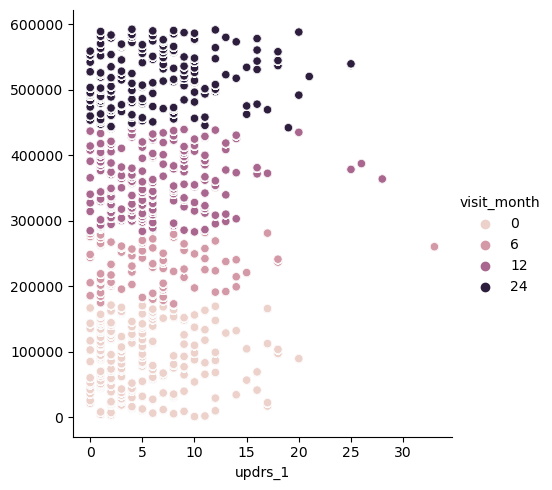

In [62]:
import seaborn as sns
sns.relplot(data = train_r, y= np.arange(0,len(train_r.updrs_1)) , x= 'updrs_1', hue='visit_month')

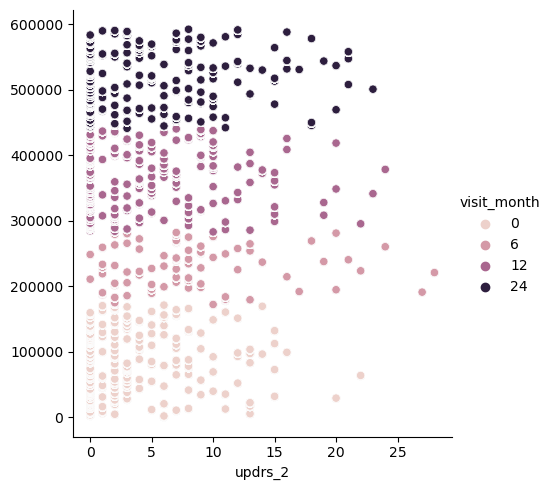

In [64]:
sns.relplot(data = train_r, y= np.arange(0,len(train_r.updrs_2)) , x= 'updrs_2', hue='visit_month')

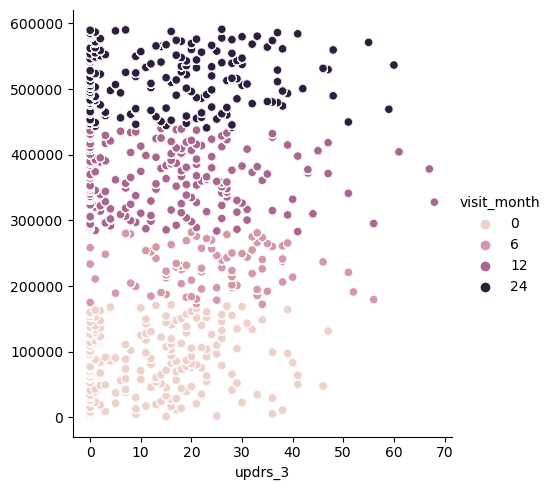

In [65]:
sns.relplot(data = train_r, y= np.arange(0,len(train_r.updrs_3)) , x= 'updrs_3', hue='visit_month')

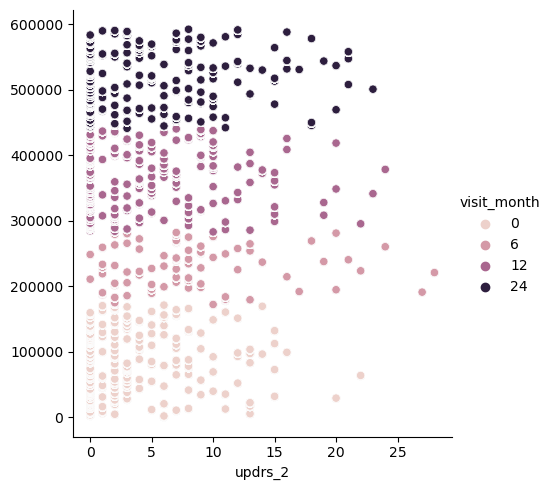

In [66]:
sns.relplot(data = train_r, y= np.arange(0,len(train_r.updrs_2)) , x= 'updrs_2', hue='visit_month')

In [55]:
from scipy import stats

stats.ttest_ind(a[0][0], a[0][1])

Ttest_indResult(statistic=nan, pvalue=nan)

Selecting only row when we have all outcome available

In [67]:
print('data outcome updrs_4 have null value on',train_r.updrs_4.isnull().sum()/len(train_r) *100 ,'%')

data outcome updrs_4 have null value on 60.76620416906701 %


In [68]:
outcome_miss =  np.where(train_r.updrs_4.isnull() == True)[0].tolist()+ np.where(train_r.updrs_1.isnull() == True)[0].tolist() + np.where(train_r.updrs_2.isnull() == True)[0].tolist() + np.where(train_r.updrs_3.isnull() == True)[0].tolist() 
outcome_miss = np.unique(outcome_miss)
len((outcome_miss) )/ len(train_r) *100

61.230616406304115

In [69]:
train_full = train_r.drop(index = outcome_miss).reset_index(drop=True)
train_full 

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4
0,1517_0,0,1517,O00391,NEQEQPLGQWHLS,11648.9,11648.9,11.0,6.0,25.0,5.0
1,1517_0,0,1517,O00533,GNPEPTFSWTK,63593.4,419015.0,11.0,6.0,25.0,5.0
2,1517_0,0,1517,O00533,IEIPSSVQQVPTIIK,99566.6,419015.0,11.0,6.0,25.0,5.0
3,1517_0,0,1517,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,16351.0,419015.0,11.0,6.0,25.0,5.0
4,1517_0,0,1517,O00533,SMEQNGPGLEYR,15566.0,419015.0,11.0,6.0,25.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
229483,63889_24,24,63889,Q9UHG2,ARAEAQEAEDQQAR,51666.5,259191.0,8.0,2.0,7.0,2.0
229484,63889_24,24,63889,Q9UHG2,GEAAGAVQELAR,65033.3,259191.0,8.0,2.0,7.0,2.0
229485,63889_24,24,63889,Q9UHG2,ILAGSADSEGVAAPR,135876.0,259191.0,8.0,2.0,7.0,2.0
229486,63889_24,24,63889,Q9UNU6,KNM(UniMod_35)FEFLK,21462.6,21462.6,8.0,2.0,7.0,2.0


In [70]:
train_full.visit_id = train_full.visit_id.astype('int')
train_full.dtypes

visit_id              int64
visit_month           int64
patient_id            int64
UniProt              object
Peptide              object
PeptideAbundance    float64
NPX                 float64
updrs_1             float64
updrs_2             float64
updrs_3             float64
updrs_4             float64
dtype: object

In [71]:

X, y = train_full.drop(columns =targets), train_full[targets]
X

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX
0,15170,0,1517,O00391,NEQEQPLGQWHLS,11648.9,11648.9
1,15170,0,1517,O00533,GNPEPTFSWTK,63593.4,419015.0
2,15170,0,1517,O00533,IEIPSSVQQVPTIIK,99566.6,419015.0
3,15170,0,1517,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,16351.0,419015.0
4,15170,0,1517,O00533,SMEQNGPGLEYR,15566.0,419015.0
...,...,...,...,...,...,...,...
229483,6388924,24,63889,Q9UHG2,ARAEAQEAEDQQAR,51666.5,259191.0
229484,6388924,24,63889,Q9UHG2,GEAAGAVQELAR,65033.3,259191.0
229485,6388924,24,63889,Q9UHG2,ILAGSADSEGVAAPR,135876.0,259191.0
229486,6388924,24,63889,Q9UNU6,KNM(UniMod_35)FEFLK,21462.6,21462.6


In [72]:
y

,updrs_1,updrs_2,updrs_3,updrs_4
0,11.0,6.0,25.0,5.0
1,11.0,6.0,25.0,5.0
2,11.0,6.0,25.0,5.0
3,11.0,6.0,25.0,5.0
4,11.0,6.0,25.0,5.0
...,...,...,...,...
229483,8.0,2.0,7.0,2.0
229484,8.0,2.0,7.0,2.0
229485,8.0,2.0,7.0,2.0
229486,8.0,2.0,7.0,2.0


How the updrs_4 is represent ? too much nan values

In [73]:
y['updrs_4'].value_counts()

0.0     155621
5.0      12892
3.0      10927
2.0      10637
4.0       9696
6.0       5930
7.0       4999
8.0       3989
9.0       3684
1.0       3380
12.0      1811
13.0      1774
11.0      1744
10.0      1678
14.0       726
Name: updrs_4, dtype: int64

## Multivariate analysis

In [74]:
col_int = X.select_dtypes(exclude = 'object').columns.tolist()
col_int

['visit_id', 'visit_month', 'patient_id', 'PeptideAbundance', 'NPX']

In [75]:
# One hot encoding for categorical variable (peptide, uniprot)
X.head()
X_ = pd.get_dummies(X)
col_all = X_.columns.tolist()
col_cat = list(set(col_all)-set(col_int))
X_[col_cat] = X_[col_cat].astype('category')
X_.head()

,visit_id,visit_month,patient_id,PeptideAbundance,NPX,UniProt_O00391,UniProt_O00533,UniProt_O00584,UniProt_O14498,UniProt_O14773,...,Peptide_YSLTYIYTGLSK,Peptide_YTTEIIK,Peptide_YVGGQEHFAHLLILR,Peptide_YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,Peptide_YVMLPVADQDQC(UniMod_4)IR,Peptide_YVNKEIQNAVNGVK,Peptide_YWGVASFLQK,Peptide_YYC(UniMod_4)FQGNQFLR,Peptide_YYTYLIMNK,Peptide_YYWGGQYTWDMAK
0,15170,0,1517,11648.9,11648.9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15170,0,1517,63593.4,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15170,0,1517,99566.6,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15170,0,1517,16351.0,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15170,0,1517,15566.0,419015.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
import scipy.stats as stats

cat_var = pd.concat([X_[col_cat],y],axis=1)
cat_var

,UniProt_P04075,Peptide_VPVAVQGEDTVQSLTQGDGVAK,Peptide_YYC(UniMod_4)FQGNQFLR,Peptide_VKDLATVYVDVLK,Peptide_QQLVETHMAR,Peptide_MDYPKQTQVSVLPEGGETPLFK,Peptide_GEVQAMLGQSTEELRVR,Peptide_TSAHGNVAEGETKPDPDVTER,Peptide_YLQEIYNSNNQK,Peptide_ELSSFIDKGQELC(UniMod_4)ADYSENTFTEYKK,...,UniProt_P23142,Peptide_FLNVLSPR,Peptide_SKEFQLFSSPHGK,Peptide_TLEAQLTPR,UniProt_P01594,UniProt_Q562R1,updrs_1,updrs_2,updrs_3,updrs_4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11.0,6.0,25.0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11.0,6.0,25.0,5.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11.0,6.0,25.0,5.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11.0,6.0,25.0,5.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11.0,6.0,25.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.0,2.0,7.0,2.0
229484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.0,2.0,7.0,2.0
229485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.0,2.0,7.0,2.0
229486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.0,2.0,7.0,2.0


In [126]:
test_par = pd.DataFrame(index= col_cat)
test_par

""
Peptide_MYYSAVDPTKDIFTGLIGPM(UniMod_35)K
Peptide_KVESELIKPINPR
Peptide_GNQWVGYDDQESVK
UniProt_Q13449
Peptide_AVSEKEVDSGNDIYGNPIKR
...
UniProt_P30086
Peptide_SFNRGEC(UniMod_4)
UniProt_P02452
UniProt_P04075


In [128]:
b = 0
a = []
for j in targets:
    print(j)
    for i in col_cat: 
        print(b)
        y1 = cat_var[cat_var[i]==0][j]
        y2 = cat_var[cat_var[i]==1][j]
        a.append(stats.ttest_ind(a=y1, b=y2, equal_var=True)[1])
        b = b + 1
    test_par[j] = a
    a = []

        


updrs_1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
27

## Models evaluation

In [77]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
Xtrain, Xtest, ytrain, ytest = train_test_split( X_, y, test_size=0.30, random_state=12)

Check if train and test have the same %

<AxesSubplot:xlabel='updrs_1', ylabel='Count'>

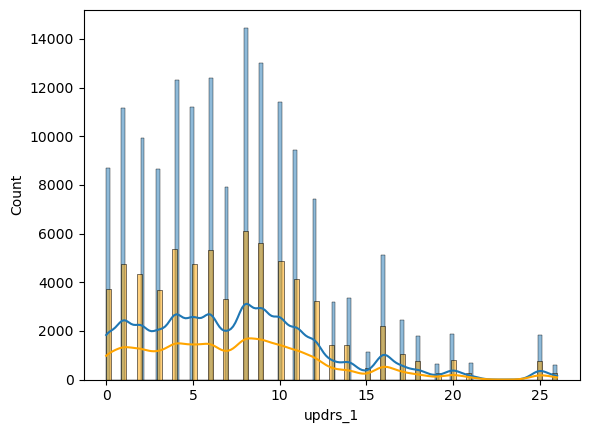

In [79]:
fig, ax = plt.subplots()
sns.histplot(ytrain['updrs_1'] , ax= ax, kde=True)
sns.histplot(ytest['updrs_1'], color = 'orange', ax=ax, kde = True)


<AxesSubplot:xlabel='updrs_2', ylabel='Count'>

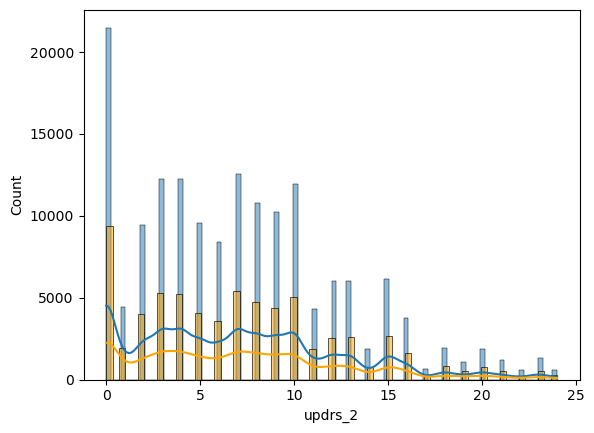

In [80]:
fig, ax = plt.subplots()

sns.histplot(ytrain['updrs_2'] , ax= ax, kde=True)
sns.histplot(ytest['updrs_2'], color = 'orange', ax=ax, kde = True)


<AxesSubplot:xlabel='updrs_3', ylabel='Count'>

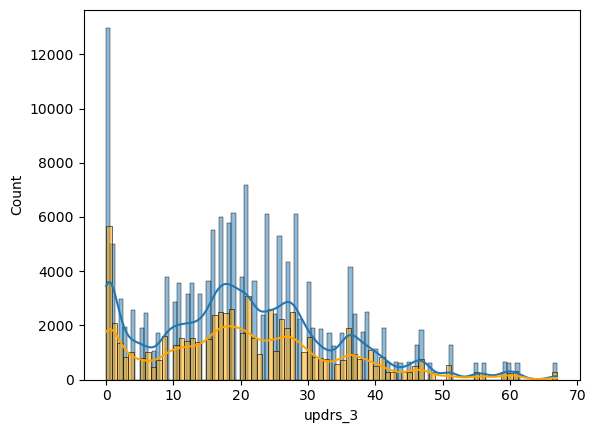

In [81]:
fig, ax = plt.subplots()

sns.histplot(ytrain['updrs_3'] , ax= ax, kde=True)
sns.histplot(ytest['updrs_3'], color = 'orange', ax=ax, kde = True)


<AxesSubplot:xlabel='updrs_4', ylabel='Count'>

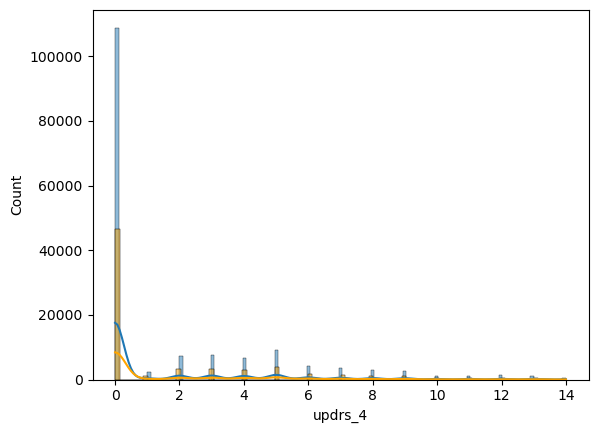

In [82]:
fig, ax = plt.subplots()

sns.histplot(ytrain['updrs_4'] , ax= ax, kde=True)
sns.histplot(ytest['updrs_4'], color = 'orange', ax=ax, kde = True)


##Train test prediction multinomial regression example

For the regression algorithms that don’t handle multi-output regression, the scikit-learn package offers wrappers that can be used for such tasks:

- MultiOutputRegressor: This strategy fits one regressor estimator per target class. This strategy can be used for regressor estimators that don't handle multi-output regression such as LinearSVC.
- RegressorChain: This strategy can be used when the regression targets features are dependent on each other. In this strategy chain of the regressor, estimators are trained with the independent continuous features along with the prediction of the last estimator.

<AxesSubplot:>

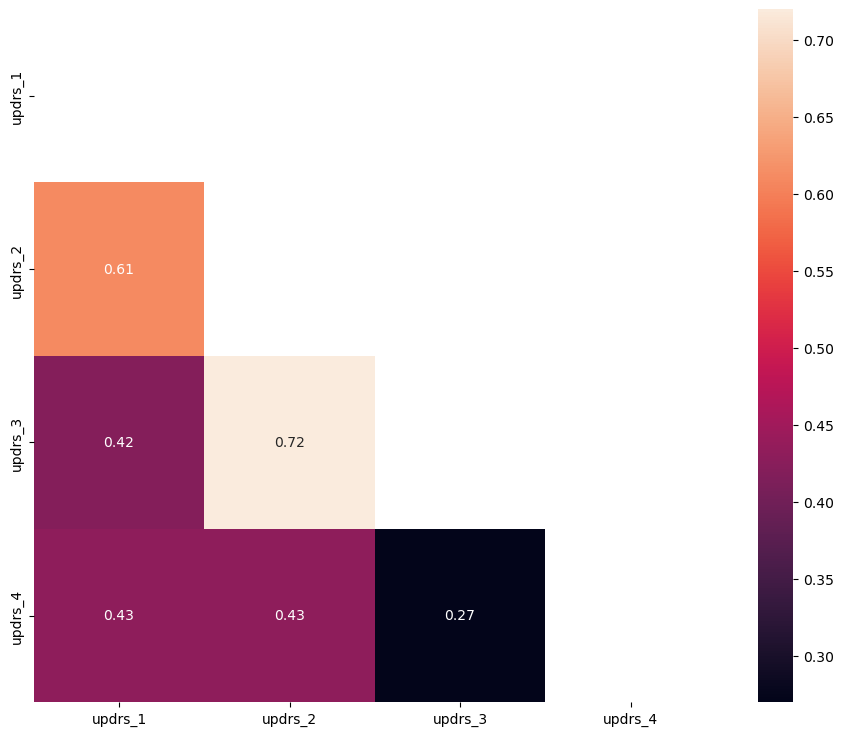

In [85]:
# Correlation between targets all are continuous 
corr = y.corr().round(2)
mask = np.triu(np.ones_like(y.corr()))
fig, ax = plt.subplots(figsize= (11,9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap( corr, mask=mask, annot=True)

In [106]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [99]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true!=0)|(y_pred!=0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap) + 1

BASIC TRAIN TEST LINEAR REGRESSION MULTI OUTPUT

STRAIGHT

In [81]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

In [90]:
ypred_lr = lr.predict(Xtest)
ypred_lr = pd.DataFrame(ypred_lr, columns= targets)
ypred_lr

,updrs_1,updrs_2,updrs_3,updrs_4
0,7.926677,7.992132,22.852418,1.756362
1,5.814537,4.724669,16.015816,1.533700
2,8.753794,7.837594,21.656721,1.759757
3,8.545334,7.413335,20.884510,1.549706
4,7.571999,7.480215,21.301539,1.654416
...,...,...,...,...
68842,7.739236,8.106823,23.554190,2.012216
68843,7.537175,7.182019,20.597067,1.500296
68844,8.508464,8.240085,22.898471,2.149016
68845,7.853394,7.716371,22.897544,1.666095


In [102]:
c = 0
for i in targets : 
    print(smape(ypred_lr[i].values, ytest[i].values))
    c = c + smape(ypred_lr[i].values, ytest[i].values)
c

62.92534625363898
73.07107701667343
63.96731408513676
165.0672366303548


365.03097398580394

In [111]:
rf = RandomForestRegressor(random_state=14)
rf.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=14)

In [113]:
ypred_rf = pd.DataFrame(rf.predict(Xtest), columns= targets)
ypred_rf

,updrs_1,updrs_2,updrs_3,updrs_4
0,15.0,9.0,24.0,0.0
1,4.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0
3,3.0,4.0,15.0,0.0
4,10.0,4.0,18.0,4.0
...,...,...,...,...
68842,4.0,10.0,29.0,0.0
68843,9.0,11.0,19.0,0.0
68844,7.0,6.0,12.0,0.0
68845,25.0,8.0,30.0,0.0


In [114]:
c = 0
for i in targets : 
    print(smape(ypred_rf[i].values, ytest[i].values))
    c = c + smape(ypred_rf[i].values, ytest[i].values)
c

1.0
1.0
1.0
1.0


4.0

TEST

NameError: name 'env' is not defined

ITERATIVELY 

In [105]:
for i in range(4):
    y_train,y_test = ytrain[targets[i]], ytest[targets[i]]
    lr = LinearRegression()

0
1
2
3


In [ ]:
# set up prediction function
def get_predictions(clinical_df, peptides_df, proteins_df, model=None):
    pred_df = pd.DataFrame()
    for m in [0, 6, 12, 24]:
        temp_df = clinical_df[["row_id"]]
        temp_df["prediction_id"] = temp_df["row_id"] + "_plus_" + str(m) + "_months"
        temp_df["rating"] = (clinical_df["visit_month"] + m) / 6
        temp_df = temp_df[["prediction_id", "rating"]]
        pred_df = pred_df.append(temp_df)
            
    pred_df = pred_df.drop_duplicates(subset=["prediction_id", "rating"])
    return pred_df


Trying KFOLD with optimization 

In [83]:
clf = tree.Decision

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX
141875,10718_24,24,10718,O15240,AYQGVAAPFPK,67326.6,99180.2
156196,18204_24,24,18204,P02647,LSPLGEEMR,645952.0,14316800.0
97988,41883_12,12,41883,P02649,GEVQAMLGQSTEELR,45737.9,7154030.0
219388,57507_24,24,57507,P02768,KYLYEIAR,1958610.0,362821000.0
27856,47513_0,0,47513,Q13740,SSNTYTLTDVRR,11037.6,33178.9
...,...,...,...,...,...,...,...
206083,51846_24,24,51846,P10909,YVNKEIQNAVNGVK,110110.0,6560050.0
36482,61974_0,0,61974,P61769,VNHVTLSQPK,259568.0,343594.0
40177,49995_6,6,49995,P01009,SASLHLPK,174117.0,10255100.0
150781,14344_24,24,14344,P01024,AGDFLEANYMNLQR,96321.4,2253120.0


# Prediction test 

In [ ]:
env = amp_pd_peptide.make_env()
iter_test = env.iter_test()



In [39]:

count = 0 
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    
    targets = sample_submission.prediction_id.str.replace('_plus','').str.split('_').str[2:6].apply(lambda x: '_'.join(x))
    if count == 0: 
        print (targets)
    print (10*'---sample submission ---')
    print (sample_submission.head())
    print (10*'------')
    
    
    sample_submission['rating'] = targets.map(mean_dict)
    env.predict(sample_submission)
    
    count += 1

In [40]:
sample_submission

,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,0,0
1,3342_0_updrs_1_plus_6_months,0,0
2,3342_0_updrs_1_plus_12_months,0,0
3,3342_0_updrs_1_plus_24_months,0,0
4,3342_0_updrs_2_plus_0_months,0,0
...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6
60,50423_6_updrs_4_plus_0_months,0,6
61,50423_6_updrs_4_plus_6_months,0,6
62,50423_6_updrs_4_plus_12_months,0,6
